In [ ]:
!pip install tensorflow scikit-learn matplotlib seaborn


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/bank-additional-full.csv"  # Adjust if necessary
df = pd.read_csv(file_path, sep=';')

# Display basic information about the dataset
df.info()

# Show the first few rows of the dataset
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Check for missing values
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# Fill missing values (if any)
df = df.fillna(method='ffill')  # Or use df.fillna(0) if suitable


<ipython-input-4-f5ba421fbb97>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Or use df.fillna(0) if suitable


In [ ]:
# Convert categorical variables to numerical using label encoding or one-hot encoding
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding, drop first to avoid dummy variable trap


In [ ]:
# Check the target variable 'y' (subscription) and drop it from features
X = df.drop(columns=['y_yes'])  # Drop the target column
y = df['y_yes']  # Assuming 'y_yes' is the target


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries for Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8469 - loss: 7.8554 - val_accuracy: 0.8998 - val_loss: 0.4973
Epoch 2/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8709 - loss: 1.1152 - val_accuracy: 0.8923 - val_loss: 0.8080
Epoch 3/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8660 - loss: 1.3483 - val_accuracy: 0.8860 - val_loss: 0.7747
Epoch 4/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8754 - loss: 0.9279 - val_accuracy: 0.8953 - val_loss: 1.1209
Epoch 5/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8778 - loss: 0.7498 - val_accuracy: 0.9038 - val_loss: 0.3659
Epoch 6/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8749 - loss: 0.7236 - val_accuracy: 0.8282 - val_loss: 0.5170
Epoch 7/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8747 - loss: 0.9314 - val_accuracy: 0.8933 - val_loss: 0.6346
Epoch 8/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8782 - loss: 0.7602 - val_accuracy: 0.

In [ ]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9119932022335518
Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7303
        True       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238

Confusion Matrix for Random Forest:
 [[7058  245]
 [ 480  455]]


In [ ]:
# Evaluate the neural network model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)


258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9057 - loss: 0.2481
Neural Network Accuracy: 0.9075018167495728


In [ ]:
# Compare both models' performance
# (You may want to store metrics in a dictionary or DataFrame to compare them easily)


In [ ]:
# Save both models (if needed)
model_nn.save("neural_network_model.h5")  # Keras model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')  # Random Forest model


['random_forest_model.pkl']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 75% train and 25% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Import necessary libraries for Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


773/773 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8431 - loss: 15.7350 - val_accuracy: 0.9078 - val_loss: 1.9349
Epoch 2/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 2.2233 - val_accuracy: 0.9019 - val_loss: 0.8046
Epoch 3/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8693 - loss: 1.6283 - val_accuracy: 0.8869 - val_loss: 1.6249
Epoch 4/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8648 - loss: 1.5732 - val_accuracy: 0.9022 - val_loss: 0.7430
Epoch 5/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8793 - loss: 1.1581 - val_accuracy: 0.8718 - val_loss: 0.6367
Epoch 6/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8820 - loss: 0.9161 - val_accuracy: 0.9026 - val_loss: 1.3437
Epoch 7/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 1.2039 - val_accuracy: 0.8921 - val_loss: 1.9445
Epoch 8/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 1.1447 - val_accuracy: 0.8647 - val

In [ ]:
# Evaluate the neural network model on the test set
loss, accuracy = model_nn.evaluate(X_test, y_test)
print("Neural Network Accuracy: {:.4f}".format(accuracy))


322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9014 - loss: 0.4677
Neural Network Accuracy: 0.9030


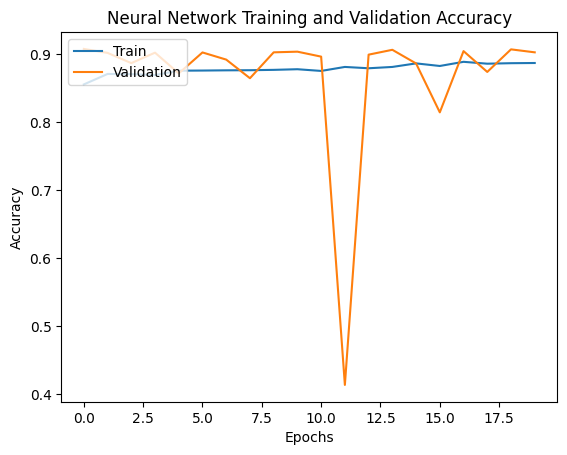

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.title('Neural Network Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9136
Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      9144
        True       0.66      0.48      0.56      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.72      0.75     10297
weighted avg       0.91      0.91      0.91     10297

Confusion Matrix for Random Forest:
 [[8852  292]
 [ 598  555]]


In [ ]:
# Print comparison of models' performance
print("Neural Network Accuracy:", accuracy)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Neural Network Accuracy: 0.9029814600944519
Random Forest Accuracy: 0.9135670583665145


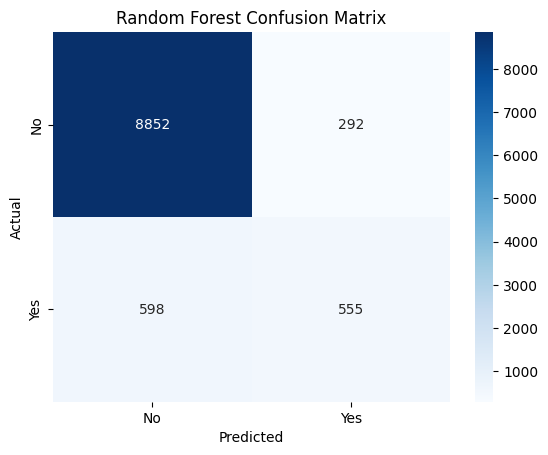

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


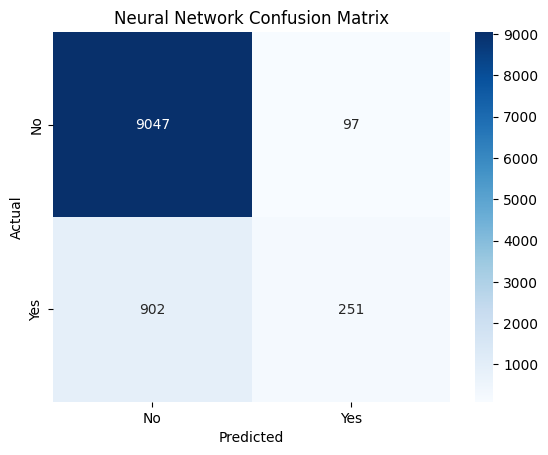

In [ ]:
import seaborn as sns

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix for Neural Network (if you make predictions for it)
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Neural Network Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Save the Neural Network model
model_nn.save('neural_network_model.h5')

# Save the Random Forest model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
!sudo apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!git clone https://github.com/Imirushik/Bank-Marketing-ML.git


Cloning into 'Bank-Marketing-ML'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
!cp -r /content/* /content/<Bank-Marketing-ML>/


/bin/bash: line 1: /: Is a directory
